In [ ]:
#!pip install pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1) Prediction of delivery time

In [3]:
data_1 = pd.read_csv('delivery_time.csv')
data_1.head()

,D Time,S Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D Time  21 non-null     float64
 1   S Time  21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
data_1.describe()

,D Time,S Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='S Time', ylabel='D Time'>

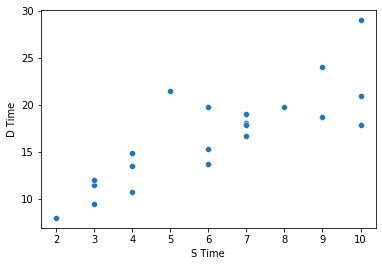

In [56]:
sns.scatterplot(x=data_1['S Time'],y=data_1['D Time'])

In [10]:
data_1.corr()

,D Time,S Time
D Time,1.000000,0.825997
S Time,0.825997,1.000000


In [4]:
data_1 = data_1.rename({'D Time':'delivery_time','S Time':'sorting_time'},axis=1)

### Fitting a Linear Regression model

In [6]:
model = smf.ols("delivery_time ~ sorting_time ",data =data_1).fit()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

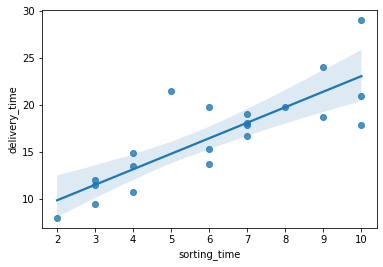

In [7]:
sns.regplot(x="sorting_time",y="delivery_time",data=data_1)

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        09:43:50   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#Coefficient
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [10]:
#R squared values
model.rsquared

0.6822714748417231

### Prediction for a new data point

In [13]:
newdata = pd.Series([12,15])

In [14]:
pred_data = pd.DataFrame(newdata,columns=['sorting_time'])
pred_data

,sorting_time
0,12
1,15


In [15]:
model.predict(pred_data)

0    26.370973
1    31.318032
dtype: float64

In [16]:
value = pd.array([16,18,20,22,24],dtype=np.int64)
pred_data1 = pd.DataFrame(value, columns=['sorting_time'])
pred_data1

,sorting_time
0,16
1,18
2,20
3,22
4,24


In [17]:
model.predict(pred_data1)

0    32.967052
1    36.265092
2    39.563132
3    42.861172
4    46.159211
dtype: float64

# 2) Prediction for Salary hike

In [19]:
data_2 = pd.read_csv('Salary_Data.csv')
data_2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [36]:
data_2.isna()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [37]:
data_2.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

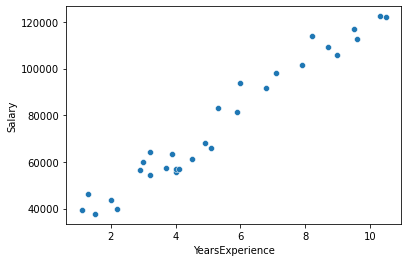

In [39]:
sns.scatterplot(x=data_2['YearsExperience'],y=data_2['Salary'])

In [40]:
data_2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


### Fitting a Linear Regression model

In [20]:
model_2 = smf.ols("Salary ~ YearsExperience",data = data_2).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

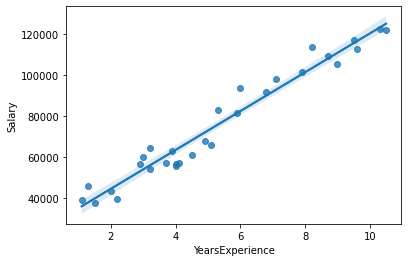

In [21]:
sns.regplot(x="YearsExperience",y="Salary",data= data_2)

In [22]:
# Coefficients
model_2.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [23]:
# R squared value
model_2.rsquared

0.9569566641435086

### Prediction for a new data point

In [24]:
data = pd.Series([10,6.5,12,3.5,15])
pred_data3 = pd.DataFrame(data,columns = ['YearsExperience'])
pred_data3

,YearsExperience
0,10.0
1,6.5
2,12.0
3,3.5
4,15.0


In [25]:
model_2.predict(pred_data3)

0    120291.823413
1     87216.955288
2    139191.748056
3     58867.068324
4    167541.635020
dtype: float64